<a href="https://colab.research.google.com/github/exponentialR/DeepLearningFundamentals/blob/main/Artificial_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf #Import the tensorflow library


In [4]:
import numpy as np  #import the numpy library 
import matplotlib.pyplot as plt   #import the matplotlib library

from mpl_toolkits.mplot3d import Axes3D #import the 3D component of the matplotlib library as this would be used later to view the data


In [5]:
#Make the datasets , this means building your own datasets 
N = 1000
X = np.random.random ((N, 2))* 6 - 3 #uniformly distributed between (-3, +3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])   #This is generally a equation Cos(2x) + Cos (3x) written in the numpy library



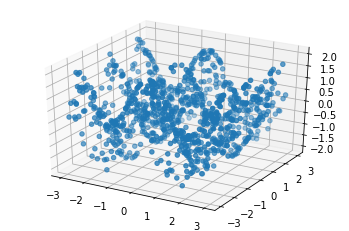

In [6]:
#Plot the function

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:,1], Y)    #This plots a 3D scattered plots | A scattered plot of the input and output


In [11]:
#Build the model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape = (2,), activation = 'relu'),  #Activation function is Rectifier Linear Unit
  tf.keras.layers.Dense(1)
])

In [12]:
#compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile (optimizer=opt, loss ='mse')    #The loss function is Mean Square Error 
r = model.fit (X, Y, epochs =100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8893
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9174
Epoch 4/100
32/32 [==============================] - 0s 957us/step - loss: 0.8496
Epoch 5/100
32/32 [==============================] - 0s 1000us/step - loss: 0.8651
Epoch 6/100
32/32 [==============================] - 0s 980us/step - loss: 0.8142
Epoch 7/100
32/32 [==============================] - 0s 971us/step - loss: 0.7693
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7167
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6560
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6270
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6832
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5799
Epoch 13/100
32/32 [========

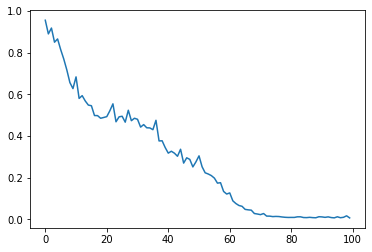

In [13]:
#plot the loss 
plt.plot(r.history['loss'], label ='loss')

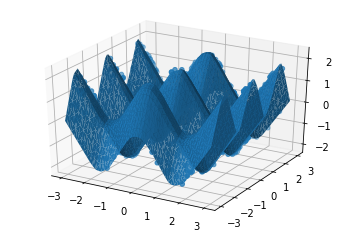

In [14]:
#Plot the prediction surface 
fig = plt.figure ()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter (X[:, 0], X[:, 1], Y)

#Surface plot 
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack ((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf (Xgrid[:, 0], Xgrid [:, 1], Yhat, linewidth = 0.2, antialiased = True)
plt.show()




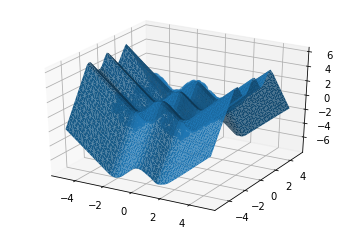

In [16]:
#can it extrapolate?
#plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], Y)

#Surface plot 
line =np.linspace(-5,5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack ((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()
